<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/main/FINAL_ESE/Question-1/Poker_hand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poker Hand Prediction

A poker game has many ways to unfold, it is considered cheating to use any kind of ill measures such as using Machine Learning Algorithms to check for different Kinds of moves.

**Flush** : A flush draw in poker, also known as a four-flush, is when you have four cards of the same suit and need only one to complete the draw and make five cards of the same suit.

**Royal flush** : A Flush but with royal cards i.e. **A K Q J 10**

**Straight** : A straight is a hand that contains five cards of sequential rank, not all of the same suit, (such as 7♣ 6♠ 5♠ 4♥ 3♥). It ranks below a flush and above three of a kind.

**Other combinations** : If the other cards are in series, they can range from 4 to 2 where any of the same cards are obtained and are similarly placed in the hierarchy.

## Importing Libraries

In [91]:
import numpy as np # for linear algebra and other mathematical operations
import pandas as pd # data processing and to read datasets

from sklearn.model_selection import train_test_split # for splitting datasets in Machine Learning

## Setting path for the datasets
You can change it according to your own paths, here I have uploaded it locally which will be discarded after I close the session

In [92]:
train_data_path = "poker-hand-testing.data"
test_data_path = "poker-hand-training-true.data"

## Data Analytics and Selecting features
Here we examine the datasets and then carefully select all the given parameters

In [93]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [94]:
train_data.shape, test_data.shape

((999999, 11), (25009, 11))

In [95]:
train_data.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [96]:
train_data['0'].value_counts()

0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: 0, dtype: int64

In [97]:
line = train_data.iloc[1]
print(type(line))

<class 'pandas.core.series.Series'>


In [98]:
#creating a testing dictionary
test = {
    '1' : 1,
    '1.1' : 2,
    '1.2' : 1,
    '13' : 3,
    '2' : 2,
    '4' : 4,
    '2.1' : 2,
    '3' : 5,
    '1.3' : 2,
    '12' : 6
}

In [99]:
# to extract data from a row
def series_to_dict(ser):
  dic = {}
  dic['1'] = ser[0]
  dic['1.1'] = ser[1]
  dic['1.2'] = ser[2]
  dic['13'] = ser[3]
  dic['2'] = ser[4]
  dic['4'] = ser[5]
  dic['2.1'] = ser[6]
  dic['3'] = ser[7]
  dic['1.3'] = ser[8]
  dic['12'] = ser[9]

  return dic

line = train_data.iloc[1]
print(series_to_dict(line))

{'1': 1, '1.1': 9, '1.2': 4, '13': 6, '2': 1, '4': 4, '2.1': 3, '3': 2, '1.3': 3, '12': 9}


In [100]:
#function to check for flush
def check_flush(dic):
  # initialising suites of data
  S1 = dic['1']
  S2 = dic['1.2']
  S3 = dic['2']
  S4 = dic['2.1']
  S5 = dic['1.3']
  #check if all suites same
  if S1 == S2 == S3 == S4 == S5:
    return 1 # matching suites 
  else:
    return 0

In [101]:
#to check for straight
def check_straight(dic):

    # Extract classes
    C1 = dic['1.1'] 
    C2 = dic['13'] 
    C3 = dic['4'] 
    C4 = dic['3'] 
    C5 = dic['12']
    
    class_flag = 1
    
    # Make a class list 
    C = [C1, C2, C3, C4, C5]
    
    # Sort the list 
    C.sort()
    
    # Start checking for a 
    for i in range(len(C)-1):
        if C[i+1]==C[i]+1:
            pass
        else:
            class_flag = 0
            break
    return class_flag

In [102]:
check_straight(test)

1

In [103]:
#for other combinations
def check_from_4_to_9(dic):

    # Extract classes
    C1 = dic['1.1'] 
    C2 = dic['13'] 
    C3 = dic['4'] 
    C4 = dic['3'] 
    C5 = dic['12']
    
    # Counts the number of unique cards in the sorted list
    counter = 1
    
    # Make a class list 
    C = [C1, C2, C3, C4, C5]
    C.sort()
    
    # Looping through all cases
    for i in range(1,5):
        if C[i] == C[i-1]:
            pass
        else: 
            counter += 1
    
    # 4 unique cards mean one pair
    if counter == 4:
        return 1    # Assigned label 
    
    # 3 unique cards could mean 2 pair or 3 of a kind 
    elif counter == 3: 
        
        # create counters for val counts 
        count = [1, 0, 0]
        
        j = 0
        for i in range(1, 5):
            if C[i] == C[i-1]:
                count[j] += 1
            else:
                j+=1
                count[j] += 1
        # Sort value counts list 
        count.sort()
        
        if count[2] == 2:
            return 2    # TWO PAIR CONDITION SATISFIED 
        
        if count[2] == 3: 
            return 3    # THREE OF A KIND CONDTITION SATISFIED 
    
    # If 2 unique cards then we could have 4 of a kind or full house 
    elif counter == 2: 
        
        # Check condition for four of a kind 
        if C[0] == C[1]:
            if C[0] == C[1] == C[2] == C[3]:
                return 7    # Four of a kind contion satisfied
            else:
                # Check full house conditions 
                return 6
        else:
            # Only four of a kind possible 
            return 7
    
    # If none
    else:
        return 0
                
# Tested and working      
            

In [104]:
check_from_4_to_9(test)

0

In [105]:
def check_royal(dic):

    # Extract classes
    C1 = dic['1.1'] 
    C2 = dic['13'] 
    C3 = dic['4'] 
    C4 = dic['3'] 
    C5 = dic['12']
    
    # Make a class list 
    C = [C1, C2, C3, C4, C5]
    C.sort()
    
    # Check for Royal 
    if C[0] == 1: 
        for i in range(1, 5):
            if C[i] != 9 + i:
                       return 0
        return 1

In [106]:
#function to assign labels to the series data
def assign_hand_label(ser):

    
    # Extract Data 
    hand = series_to_dict(ser)
    # Check if a flush 
    if check_flush(hand):
        
        # Check if a Royal Flush 
        if check_royal(hand):
            return 9
        
        # Check if straight flush 
        elif check_straight(hand):
            return 8
        
        else: 
            return 5 
    
    # Check for the rest 
    if check_straight(hand) or check_royal(hand):
        return 4
    else:
        return check_from_4_to_9(hand)
    
#     # If all fail 
#     else: 
#         return 0 

In [107]:
line=train_data.iloc[814]
assign_hand_label(line)

4

In [108]:
pred = [] 
for i in range(len(train_data)):
    line = train_data.iloc[i]
    val = assign_hand_label(line)
    print("{}. True Value: {} and Predicted Value: {}".format(i, line['0'], val))
    pred.append(val)

Streaming output truncated to the last 5000 lines.
994999. True Value: 1 and Predicted Value: 1
995000. True Value: 1 and Predicted Value: 1
995001. True Value: 0 and Predicted Value: 0
995002. True Value: 1 and Predicted Value: 1
995003. True Value: 0 and Predicted Value: 0
995004. True Value: 0 and Predicted Value: 0
995005. True Value: 1 and Predicted Value: 1
995006. True Value: 1 and Predicted Value: 1
995007. True Value: 1 and Predicted Value: 1
995008. True Value: 2 and Predicted Value: 2
995009. True Value: 1 and Predicted Value: 1
995010. True Value: 1 and Predicted Value: 1
995011. True Value: 1 and Predicted Value: 1
995012. True Value: 4 and Predicted Value: 4
995013. True Value: 0 and Predicted Value: 0
995014. True Value: 1 and Predicted Value: 1
995015. True Value: 0 and Predicted Value: 0
995016. True Value: 1 and Predicted Value: 1
995017. True Value: 1 and Predicted Value: 1
995018. True Value: 1 and Predicted Value: 1
995019. True Value: 1 and Predicted Value: 1
9950

In [109]:
# Check accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_train = train_data['0'].values

# Convert pred to series
pred = pd.Series(pred)
acc_sc = accuracy_score(y_true=y_train, y_pred=pred)
print(acc_sc)

1.0


In [110]:
print(classification_report(y_true=y_train, y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    501208
           1       1.00      1.00      1.00    422498
           2       1.00      1.00      1.00     47622
           3       1.00      1.00      1.00     21121
           4       1.00      1.00      1.00      3885
           5       1.00      1.00      1.00      1996
           6       1.00      1.00      1.00      1424
           7       1.00      1.00      1.00       230
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00         3

    accuracy                           1.00    999999
   macro avg       1.00      1.00      1.00    999999
weighted avg       1.00      1.00      1.00    999999



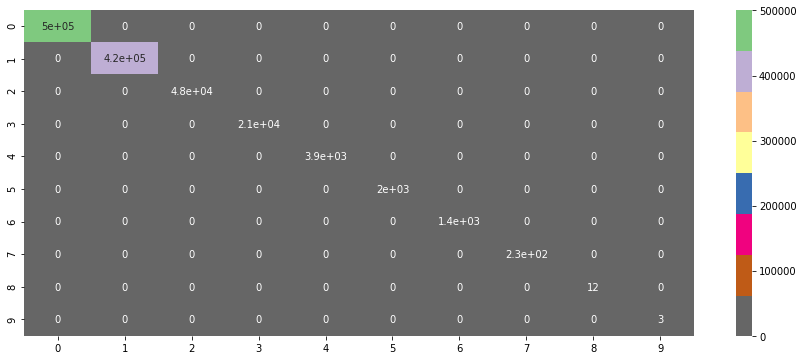

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=pred), annot=True, cmap='Accent_r')

In [112]:
print(pred.unique())

[1 0 2 3 5 4 6 7 8 9]


In [113]:
test_pred = [] 
for i in range(len(test_data)):
    line = test_data.iloc[i]
    val = assign_hand_label(line)
    test_pred.append(val)

In [114]:
test_pred

[9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 1,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 5,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,


In [115]:
# Check accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_test = test_data['9'].values

# Convert pred to series
test_pred = pd.Series(test_pred)
acc_sc = accuracy_score(y_true=y_test, y_pred=test_pred)
print(acc_sc)

1.0


In [116]:
print(classification_report(y_true=y_test, y_pred=test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12493
           1       1.00      1.00      1.00     10599
           2       1.00      1.00      1.00      1206
           3       1.00      1.00      1.00       513
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        54
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         4

    accuracy                           1.00     25009
   macro avg       1.00      1.00      1.00     25009
weighted avg       1.00      1.00      1.00     25009



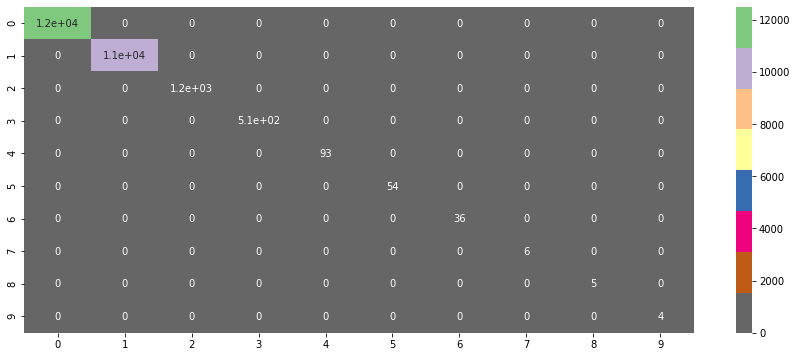

In [117]:
plt.figure(figsize=(15, 6))
y_test = test_data['9'].values
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Accent_r')

In [118]:
print(test_pred.unique())

[9 8 1 0 4 3 2 5 6 7]
